<a href="https://colab.research.google.com/github/AnnaBujniewicz/semester_project/blob/main/M4_work_in_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial steps

In [ ]:
# importing the needed packages
!pip install yfinance
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import optimizers
from keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.linear_model import LinearRegression
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import np_utils
import gensim
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from datetime import datetime
!pip install lime
from lime.lime_text  import LimeTextExplainer
nltk.download('wordnet')
warnings.filterwarnings('ignore')
from collections import Counter
import itertools
from nltk.tokenize import word_tokenize
nltk.download('punkt')

     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22615 sha256=1115f53baab45e35a1017da849e52ff605b0cf6eb79371297885579eb89e892d
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 276kB 5.8MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283846 sha256=831cec4ca9d43ac4ff20783116eb0458e68056c48854a4aa76985a4b4570eeab
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpo

True

In [ ]:
from keras import backend as K

In [ ]:
# loading in the stock data
jpm_df = yf.download('JPM', 
                      start='2018-09-15', 
                      end='2020-06-03', 
                      progress=False)

Those specific dates were chosen, as in further part of the project the stock data will be combined with data based on news articles. The dataset containg the news headers has news articles about JP Morgan for the same dates as the ones selected here to make sure we maximize the ammuont of data we have.

In [ ]:
# inspecting the dataframe
jpm_df.head()

Open        High  ...   Adj Close    Volume
Date                                ...                      
2018-09-17  113.790001  114.430000  ...  105.784088   9561300
2018-09-18  114.330002  114.660004  ...  106.211540   7944200
2018-09-19  114.440002  118.059998  ...  109.296608  16052800
2018-09-20  118.500000  119.239998  ...  110.235130  15590000
2018-09-21  119.129997  119.230003  ...  109.510323  24788200

[5 rows x 6 columns]

# 1 Cleanup and exploratory analysis of the stock data

In [ ]:
# inspecting the dataframe with info - no missing values, every column is numeric
jpm_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 430 entries, 2018-09-17 to 2020-06-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       430 non-null    float64
 1   High       430 non-null    float64
 2   Low        430 non-null    float64
 3   Close      430 non-null    float64
 4   Adj Close  430 non-null    float64
 5   Volume     430 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.5 KB


In [ ]:
# inspecting the dataframe with describe to explore the distributions and check minimum/maximum for nonsensical values
jpm_df.describe()

Open        High         Low       Close   Adj Close        Volume
count  430.000000  430.000000  430.000000  430.000000  430.000000  4.300000e+02
mean   111.703349  112.887768  110.604349  111.726000  106.813664  1.519650e+07
std     13.640553   13.335926   13.969117   13.692297   13.539015  7.991818e+06
min     81.559998   83.750000   76.910004   79.029999   76.750183  3.324300e+06
25%    103.494999  104.329998  102.732502  103.439999   97.874006  9.852975e+06
50%    109.880001  110.885002  108.910000  109.865002  104.315460  1.272490e+07
75%    117.854998  118.632500  116.402500  117.672503  112.589857  1.800560e+07
max    139.899994  141.100006  139.259995  141.089996  136.145889  4.972520e+07

In [ ]:
# checking the stock information about the company
jpm_info = yf.Ticker('JPM')
jpm_info.info

{'52WeekChange': -0.12836856,
 'SandP52WeekChange': 0.15777445,
 'address1': '383 Madison Avenue',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 120.22,
 'askSize': 800,
 'averageDailyVolume10Day': 11534700,
 'averageVolume': 15577540,
 'averageVolume10days': 11534700,
 'beta': 1.210498,
 'beta3Year': None,
 'bid': 120.2,
 'bidSize': 800,
 'bookValue': 79.079,
 'category': None,
 'circulatingSupply': None,
 'city': 'New York',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1606694400,
 'dayHigh': 120.9899,
 'dayLow': 120,
 'dividendRate': 3.6,
 'dividendYield': 0.0299,
 'earningsQuarterlyGrowth': 0.04,
 'enterpriseToEbitda': None,
 'enterpriseToRevenue': -2.505,
 'enterpriseValue': -245579202560,
 'exDividendDate': 1609804800,
 'exchange': 'NYQ',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'expireDate': None,
 'fiftyDayAverage': 113.93714,
 'fiftyTwoW

In [ ]:
# this shows the actual recommendation for investors what option should they choose in their trading
jpm_info.recommendations

Firm        To Grade  From Grade Action
Date                                                                           
2012-02-29 07:34:00                Citigroup             Buy               main
2012-03-01 07:29:00                Citigroup             Buy               main
2012-03-08 06:00:00           Morgan Stanley      Overweight               main
2012-03-19 06:12:00           Morgan Stanley      Overweight               main
2012-03-27 07:24:00             Bank oferica             Buy               main
...                                      ...             ...         ...    ...
2020-09-29 11:32:18     Independent Research             Buy        Hold     up
2020-10-14 13:01:53            Credit Suisse      Outperform               main
2020-11-19 11:03:51  Keefe, Bruyette & Woods  Market Perform  Outperform   down
2020-11-30 13:45:21           Morgan Stanley     Underweight  Overweight   down
2020-12-03 11:27:11     Independent Research            Hold         Buy   down

[204 rows x 4 columns]

In [ ]:
# checking the information about actions
# shows the security price movement in our case JP Morgan
jpm_info.actions

Dividends  Stock Splits
Date                               
1982-04-16    0.00000           1.5
1984-03-09    0.19667           0.0
1984-04-16    0.00000           1.5
1984-06-11    0.19667           0.0
1984-09-10    0.19667           0.0
...               ...           ...
2019-10-03    0.90000           0.0
2020-01-03    0.90000           0.0
2020-04-03    0.90000           0.0
2020-07-02    0.90000           0.0
2020-10-05    0.90000           0.0

[155 rows x 2 columns]

In [ ]:
# checking who the major stakeholders are
jpm_info.major_holders

0                                      1
0   0.86%        % of Shares Held by All Insider
1  72.03%       % of Shares Held by Institutions
2  72.65%        % of Float Held by Institutions
3    3543  Number of Institutions Holding Shares

In [ ]:
# investigating the institutional stakeholders category
jpm_info.institutional_holders

Holder     Shares  ...   % Out        Value
0          Vanguard Group, Inc. (The)  242564327  ...  0.0796  23351667760
1                      Blackrock Inc.  194072559  ...  0.0637  18683365254
2            State Street Corporation  135133642  ...  0.0443  13009315715
3             Capital World Investors   74769070  ...  0.0245   7198018368
4         Bank of America Corporation   58418817  ...  0.0192   5623979512
5  Wellington Management Company, LLP   56346977  ...  0.0185   5424523475
6       Geode Capital Management, LLC   43914174  ...  0.0144   4227617530
7          Northern Trust Corporation   42442290  ...  0.0139   4085919258
8                      Morgan Stanley   37162754  ...  0.0122   3577658327
9                            FMR, LLC   36766535  ...  0.0121   3539514324

[10 rows x 5 columns]

In [ ]:
# creating a column filled with the daily change between close prices
jpm_df['change'] = (jpm_df['Close']-jpm_df['Open'])/jpm_df['Open']
jpm_df.head()

Open        High         Low  ...   Adj Close    Volume    change
Date                                            ...                                
2018-09-17  113.790001  114.430000  113.300003  ...  105.784088   9561300  0.000439
2018-09-18  114.330002  114.660004  113.559998  ...  106.211540   7944200 -0.000262
2018-09-19  114.440002  118.059998  114.440002  ...  109.296608  16052800  0.027787
2018-09-20  118.500000  119.239998  118.080002  ...  110.235130  15590000  0.001097
2018-09-21  119.129997  119.230003  117.739998  ...  109.510323  24788200 -0.010745

[5 rows x 7 columns]

In [ ]:
# only keeping the needed columns
df = jpm_df.loc[:,["Close", "Volume",'change']]
# changing the column names to lowercase
df.columns = df.columns.str.lower()
# changing the name of the index column to lowercase
df.index.name = df.index.name.lower()
# inspecting the changes
df.head()

close    volume    change
date                                      
2018-09-17  113.839996   9561300  0.000439
2018-09-18  114.300003   7944200 -0.000262
2018-09-19  117.620003  16052800  0.027787
2018-09-20  118.629997  15590000  0.001097
2018-09-21  117.849998  24788200 -0.010745

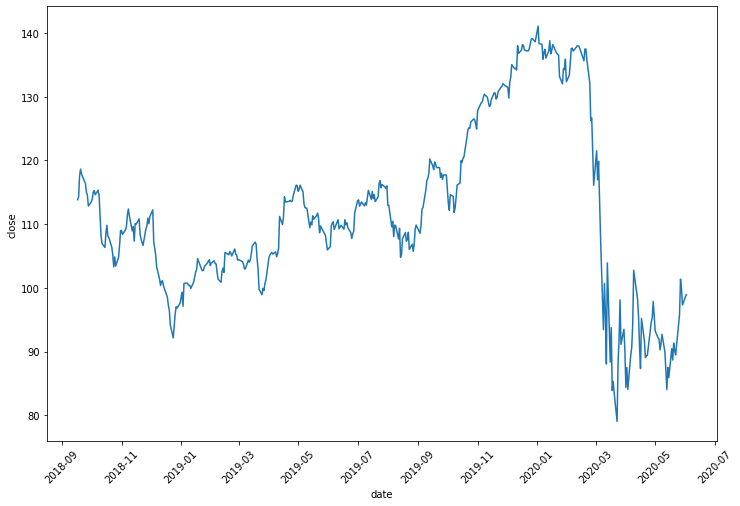

In [ ]:
# exploring the stock prices for the dataset
# it looks like they were hit rather hard by the crisis in march 2020
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.lineplot(x=df.index, y=df.close)

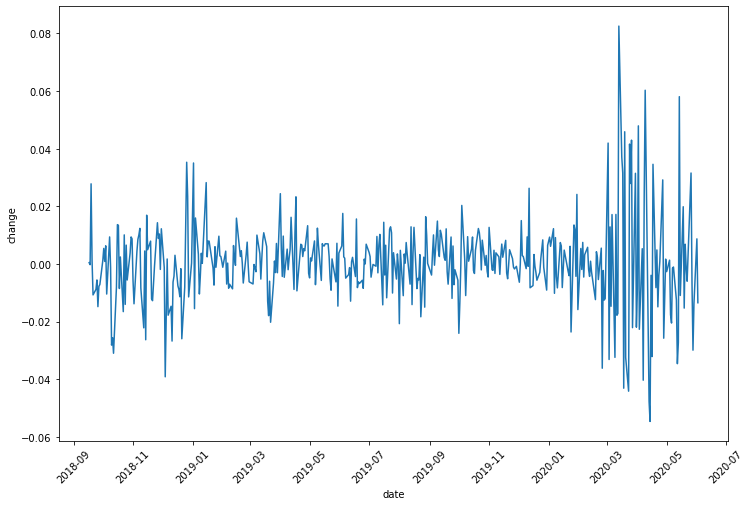

In [ ]:
# exploring the daily change in closing prices
# it can be seen that the daily changes also started fluctuating more in march 2020
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.lineplot(x=df.index, y=df.change)

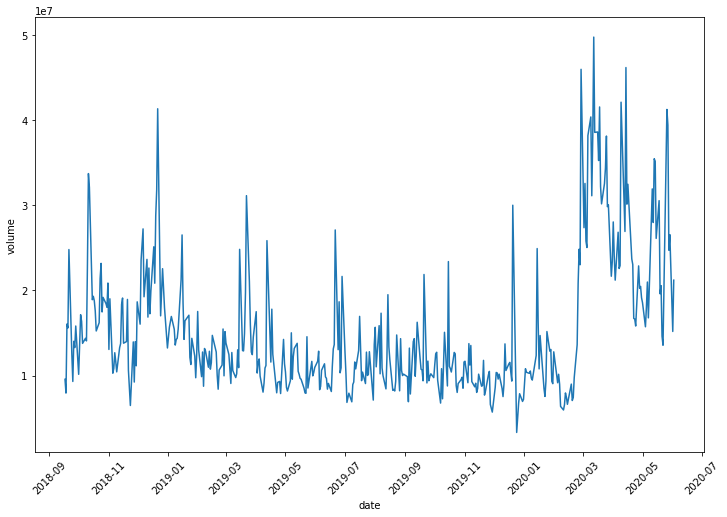

In [ ]:
# exploring the number of shares traded
# volume of stock traded where we can assume that major holders (maybe institutional)
# were selling their JP Morgen holdings which can be an indicator for the future 
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.lineplot(x=df.index, y=df.volume)

#3 Neural network for stock predictions

In [ ]:
# creating a minmaxscaler instance
# minmax scaler was chosen as it deals very well with non-normally distributed data
scaler = MinMaxScaler(feature_range=(0, 1))
# scaling the close column
df['close'] = scaler.fit_transform(df['close'].values.reshape(-1,1))

In [ ]:
# creating a new column in the dataframe that contains the same values as the close column
df["close-1"] = df["close"]
# shifting the values by one day
df["close-1"] = df["close-1"].shift(1)

As explained previously, in this case the training data is shifted by a different period - only one day. The network performs well without the need to use a larger lag due to the use of LSTM layers, that can store the information from previous periods (therefore remembering the past days, likely even more than 25 of them)

In [ ]:
# creating a train and test split (this time using 80% of the data for training)
X_train = df["close-1"][1:int(len(df["close-1"])*0.8)]
X_test = df["close-1"][int(len(df["close-1"])*0.8):]
y_train = df["close"][1:int(len(df["close-1"])*0.8)]
y_test = df["close"][int(len(df["close-1"])*0.8):]

In [ ]:
# reshaping the data appropriately
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [ ]:
# reshaping it again to make sure the dimensions are right for the network
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))

In [ ]:
# creating a sequential model
model = Sequential()
# adding the firs tLSTM layer with 128 neurons, 0.2 dropout and recurrent dropout and return_sequences = True (to connect another LSTM layer)
model.add(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape = (1,1)))
# adding another LSTM layer - this time 64 neurons and no returning sequences
model.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# adding a dropout layer with 0.5 dropout rate
model.add(layers.Dropout(0.5))
# adding a dense layer with 128 neurons
model.add(layers.Dense(128, activation = "relu"))
# adding a dense layer with 64 neurons
model.add(layers.Dense(64, activation = "relu"))
# adding another dropout layer, this time just 0.2 dropout rate
model.add(layers.Dropout(0.2))
# adding the output layer with one neuron
model.add(layers.Dense(1))

In [ ]:
# viewing the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6

The network uses two LSTM layers followed by a dropout layer, two dense layers with relu activation function, another dropout layer and then finally a dense layer with one neuron for the output.

LSTM layers were chosen over GRU despite the longer training time (they have more parameters), as they are better at dealing with long sequences, which is crucial for the stock prediction. Additionally, we didn't see the need to use bidirectional LSTM in this case, as for stock predictions one directional LSTM typically allows the model to achieve the global minimum quicker.

The dropout layers were used in order to prevent overfitting. In this case two layers were used, as due to the data type using validation split was impossible for optimal results, therefore checking for overfitting was impossible. We decided to counteract this possiblity by applying multiple dropout layers, especially considering that the network we created was rather deep, and therefore prone to overfitting.

On the issue of the network depth, we chose to use two LSTM layers and three dense layers in order to ensure that all the relations between the data can be captured accurately. Adding each of the layers present in the final model improved the accuracy of the predictions.

In [ ]:
# creating an early stopping monitor with the patience of 5 periods
stop = EarlyStopping(monitor = "loss", patience = 5, mode = "min", restore_best_weights=True)
# changing the learning rate of the optimizer
opt = optimizers.Adam(learning_rate=0.001)

In [ ]:
# compiling the model
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
# fitting the model with the batch size of 1 and 50 epochs
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1, callbacks = [stop])

Epoch 1/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0444
Epoch 2/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0256
Epoch 3/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0171
Epoch 4/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0189
Epoch 5/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0140
Epoch 6/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0157
Epoch 7/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0134
Epoch 8/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0121
Epoch 9/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0129
Epoch 10/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0130
Epoch 11/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0109
Epoch 12/50
343/343 [==============================] - 2s 4ms/step - loss: 0.0112
Epoch 13/50
343/343 [====

The early stopping monitor with the patience of 5 periods seemed to bring the best results based on the model training results (lower patience sometimes wouldn't let the model get over a local minimum, higher patience didn't seem to improve the results). Additionally, the best weights from the training will be restored.

The optimizer learning rate was changed to a lower rate for two reasons. First of all, with the default rate the training seemed to be very unstable, with large loss changes (both increases and decreases) on every epoch. Even more importantly, the issue of exploding gradients seemed to have occurred - on some runs of the model it was training well, but then sometimes the result would be a completely flat line (or a regular curve up until some point with a flat line later on). Lowering the learining rate seemed to fix both of those problems.

MSE was chosen as a loss function, as it is a suitable option for regression problems.

The batch size of 1 was chosen, as in case of stock predictions data is very variable from day to day and it is important to let the model explore those daily changes, as opposed to changes over some intervals of time (for example, if the batch size would be 5, the model would "remember" the past periods as sets of 5 days, instead of a uniform flow of time).

Lastly, the batch size was set to be 50 as this number was high enough to never be reached, as the model uses early stopping.

In [ ]:
# predicting the data
y_pred3 = model.predict(X_test)

In [ ]:
# creating an empty column
df["pred3"] = np.nan
# filling it with the predictions
df["pred3"][int(len(df["close-1"])*0.8):] = np.array(y_pred3).squeeze(1)

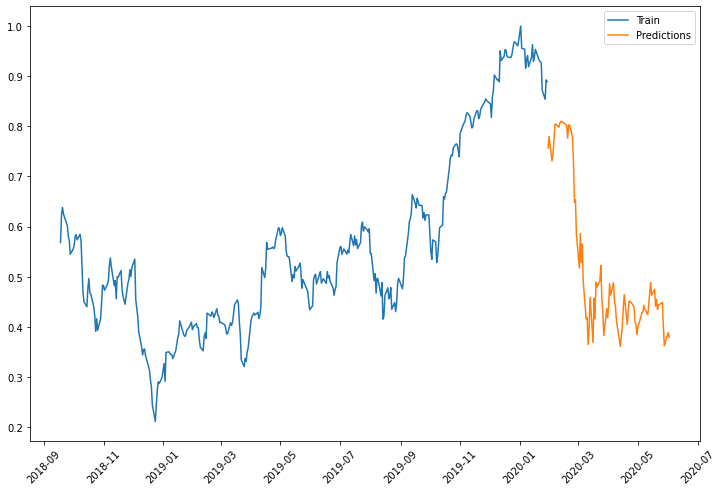

In [ ]:
# plotting the predictions as appended to the training set
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(df.close[1:int(len(df["close-1"])*0.8)])
plt.plot(df["pred3"][int(len(df["close-1"])*0.8):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

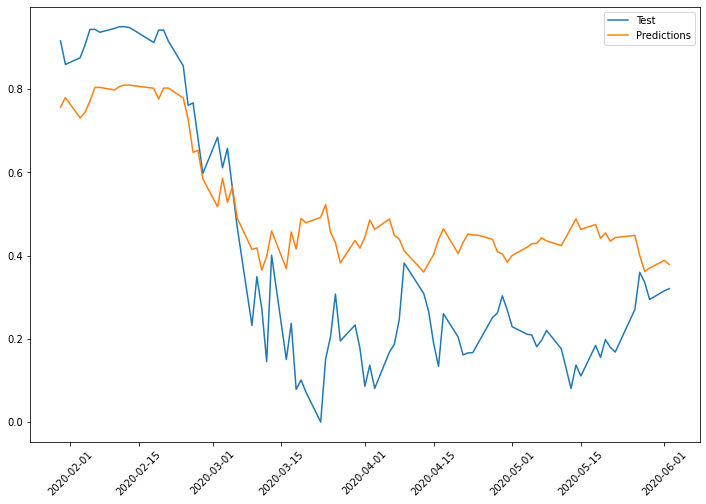

In [ ]:
# plotting the predictions and the test data
# the curves are rather similar
# the model doesn't seem to just mimick the previous day - especially visible looking at the last week
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test)
plt.plot(df["pred3"][int(len(df["close-1"])*0.8):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# checking the mean squared error
np.sqrt(np.mean(df["pred3"][int(len(df["close-1"])*0.8):] - y_test)**2)

0.12464226954405326

As can be seen, the deep learning method brought better results than simple machine learning models. Since a fairly accurate prediction could be made just based on the lagged data we decided to test if a better performance can be reached through appending additional information. In this case we decided to use the sentiment score for the financial news articles about JP Morgan.

In order to create the next model, first we will create a model for sentiment analysis. Subsequently, we will append the news headers for every given day to the dataframe and obtain their sentiment scores. Lastly, the dataset containing the sentiment scores will be used to fit another neural netwok and the network's performance will be inspected.

# 4 Model for sentiment analysis

## 4.1 Cleaning and exploring the dataset

In [ ]:
# loading in the dataframe for sentiment analysis
sent_df = pd.read_csv("https://raw.githubusercontent.com/ztakac18/M2-data/main/all-data.csv", header = 0, names = ["sentiment", "title"], encoding = "latin-1")

In [ ]:
# inspecting the dataframe
sent_df.head()

sentiment                                              title
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...

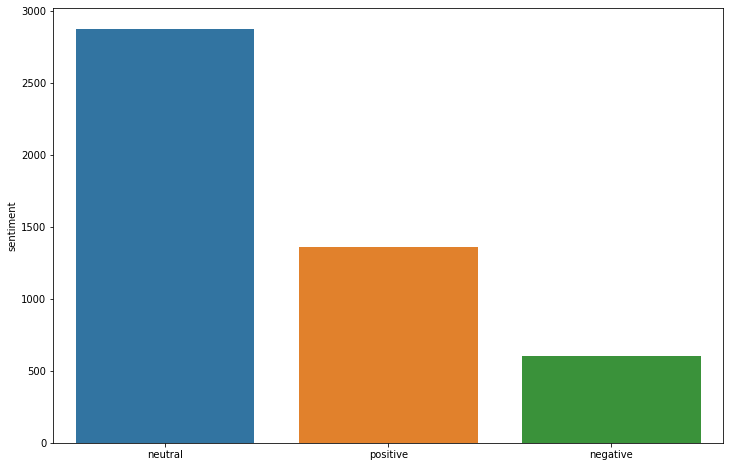

In [ ]:
# inspecting the classes
# they are rather unbalanced
plt.figure(figsize=(12,8))
sns.barplot(x=pd.DataFrame(sent_df["sentiment"].value_counts()).index,y=pd.DataFrame(sent_df["sentiment"].value_counts())["sentiment"])
plt.show()

As can be seen, the number of negative and positive headers is vastly lower than the neutral ones. For this reason resampling should be considered. We decided to not try upsampling, as it would have to result in copying the same header multiple times for the case of the negative class. That could really easily lead to some overfitting to the preexisting titles. Instead, we decided to try downsampling. It will lead to a decrease in sample size, however all the titles will still be unique.

In [ ]:
# initiating a lemmatizer instance
lemmatizer = WordNetLemmatizer()
# making a list of stopwords
stop_words = set(stopwords.words('english'))
# making a function that lemmatizes the titles and then puts them together
def sneaky_cleanup(title):
# empty list to store the tokens
  tokens = []
# iteration over the words in a given title
  for token in title.split():
# removing the stop words
    if token not in stop_words:
# removing the interpunction
      if token.isalnum():
# appending the lemmatized titles to the list
        tokens.append(lemmatizer.lemmatize(token))
# rejoining the list of words back into a title
  return " ".join(tokens)

In [ ]:
# applying the lemmatizer to each row of the dataframe
sent_df.title = sent_df.title.apply(lambda x: sneaky_cleanup(x))
# checking if everything worked correctly
sent_df.head()

sentiment                                              title
0   neutral  Technopolis plan develop stage area le square ...
1  negative  The international electronic industry company ...
2  positive  With new production plant company would increa...
3  positive  According company updated strategy year Baswar...
4  positive  FINANCING OF ASPOCOMP GROWTH Aspocomp aggressi...

We decided that cleaning up the text before applying a machine learning model would be beneficial. We lemmatized the words, removed the stopwords and interpunctions.

We chose lemmatization over stemming as it preserves the original meaning of a word better - lemmatiztion changes the word to its lemma (base of the word), whereas stemming simply cuts off the ending.

The stopwords and interpunctions were removed despite their potential importance for the context, as they typically don't improve performance in the case of sentiment analysis, as the model only needs to classify the titles into the category of positive, negative and neutral ones.


In [ ]:
# creating three new dataframes for the three sentiments
sent_pos=sent_df[sent_df["sentiment"] == "positive"]
sent_neg=sent_df[sent_df["sentiment"] == "negative"]
sent_neu=sent_df[sent_df["sentiment"] == "neutral"]
# tokenizing the titles in the dataframes
sent_pos["title"]=sent_pos["title"].apply(lambda x: word_tokenize(x))
sent_neg["title"]=sent_neg["title"].apply(lambda x: word_tokenize(x))
sent_neu["title"]=sent_neu["title"].apply(lambda x: word_tokenize(x))

In [ ]:
# finding the most popular words in the negative titles
Counter(itertools.chain(*sent_neg["title"])).most_common(10)

[('EUR', 307),
 ('mn', 224),
 ('profit', 151),
 ('The', 105),
 ('company', 104),
 ('Finnish', 99),
 ('sale', 96),
 ('period', 89),
 ('net', 88),
 ('2009', 85)]

In [ ]:
# finding the most popular words in the neutral titles
Counter(itertools.chain(*sent_neu["title"])).most_common(10)

[('The', 969),
 ('company', 553),
 ('share', 293),
 ('said', 237),
 ('Finland', 219),
 ('EUR', 217),
 ('Finnish', 215),
 ('million', 192),
 ('service', 189),
 ('sale', 187)]

In [ ]:
# finding the most popular words in the positive titles
Counter(itertools.chain(*sent_pos["title"])).most_common(10)

[('EUR', 394),
 ('The', 280),
 ('company', 262),
 ('mn', 241),
 ('said', 230),
 ('Finnish', 198),
 ('sale', 187),
 ('profit', 183),
 ('net', 175),
 ('million', 171)]

As can be seen, the words in all the titles are very similar, showing how difficult the task of predicting the sentiment will be.

In [ ]:
# inspecting the length of the titles - the longest title is just above 40 words
sent_df["words"] = sent_df["title"].map(lambda x: len(x.split()))
sent_df["words"].describe()

count    4845.000000
mean       12.831373
std         5.831930
min         1.000000
25%         8.000000
50%        12.000000
75%        16.000000
max        42.000000
Name: words, dtype: float64

In [ ]:
# creating a series of all the sentiments
y = sent_df["sentiment"]
# creating a labelencoder instance
labelencoder_y = LabelEncoder()
# encoding the sentiments
y = labelencoder_y.fit_transform(y)
# changing the sentiments to one-hot encoding
y = np_utils.to_categorical(y)

In [ ]:
# creating training and testing samples
X_train, X_test, y_train, y_test = train_test_split(sent_df["title"], y, test_size = 0.2, random_state = 44)

In [ ]:
# keeping X_test for further analysis later
X_test_initial = X_test

In [ ]:
# creating a tokenizer instance
tokenizer = Tokenizer()
# fitting the tokenizer on the training set
tokenizer.fit_on_texts(X_train)
# finding the vocabulary size equal to 90% of all the used words
vocab_size = int((len(tokenizer.word_index) + 1)*0.9)

In [ ]:
# creating a tokenizer instance - this time with a correct number of words
tokenizer = Tokenizer(num_words=vocab_size)
# fitting it to the train set
tokenizer.fit_on_texts(X_train)
# turning the train set titles to sequences
X_train = tokenizer.texts_to_sequences(X_train)
# turning the test set titles to sequences
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# padding the sequences so that they would be 40 words long
# this decision is based on the length of the longest title being just above 40 words
X_train =  keras.preprocessing.sequence.pad_sequences(X_train, maxlen=40)
X_test =  keras.preprocessing.sequence.pad_sequences(X_test, maxlen=40)
# just checking if it worked
X_train

array([[   0,    0,    0, ...,   36,    2,    8],
       [   0,    0,    0, ...,  193,   67,   14],
       [   0,    0,    0, ...,  323, 3774,  248],
       ...,
       [   0,    0,    0, ..., 2479,   89, 2085],
       [   0,    0,    0, ..., 2216,  265,   28],
       [   0,    0,    0, ...,   42, 3629,   47]], dtype=int32)

## 4.2 Building an embedding layer

This solution was used (as opposed to just using a Keras embedding layer) as it is considered to typically give better performance and increase the training speed (in terms of the number of needed epochs, not time).

We chose to train the embedding layer using the training set, as opposed to using an already trained word embedding. Both the options are known to perform rather similarly and as all the titles are written in a similar style it can likely be more beneficial to evaluate the words based on how they are used in this dataset.

In [ ]:
articles = pd.read_csv("https://github.com/AnnaBujniewicz/data_stuffs/blob/master/raw_partner_headlines.csv.zip?raw=true", compression = "zip")

In [ ]:
articles_for_embed = pd.DataFrame(articles.loc[:,"headline"])
sent_df_for_embed = pd.DataFrame(sent_df["title"])
embed = pd.concat([sent_df_for_embed,articles_for_embed], ignore_index = True)
embed["title"].fillna(embed["headline"], inplace = True)

In [ ]:
# initiating a word2vec model
w2v_model = gensim.models.word2vec.Word2Vec(size=100, window = 5, min_count = 1, workers = 4)
# creating a list of all words
documents = [_title.split() for _title in embed.title]
#  using the list of all words as vocabulary
w2v_model.build_vocab(documents)
# assigning all the unique words to a new variable - words
words = w2v_model.wv.vocab.keys()
# creating a new variable vocab_size that's the number of all the used words
vocab_size = len(words)
# training the model based on the list of all the words
w2v_model.train(documents, total_examples=len(documents), epochs=16)

(245040097, 272118736)

In [ ]:
# checking the most similar words to industry
# it seems to work
w2v_model.most_similar("industry")

[('future', 0.7431427240371704),
 ('customers', 0.7137711048126221),
 ('customer', 0.685945987701416),
 ('supplier', 0.6807973980903625),
 ('repeating', 0.6767194867134094),
 ('sector', 0.6746814846992493),
 ('arm', 0.6740515232086182),
 ('different', 0.6720678806304932),
 ('measure', 0.6645472049713135),
 ('cars', 0.6586440205574036)]

In [ ]:
# creating a matrix filled with 0
embedding_matrix = np.zeros((vocab_size, 100))
# iterating over the words in the previously used tokenizer
for word, i in tokenizer.word_index.items():
# checking if a given word appears in the model
  if word in w2v_model.wv:
# filling the matrix with the word vectors
    embedding_matrix[i] = w2v_model.wv[word]

In [ ]:
# creating a non-trainable embedding layer using the embedding matrix
embedding_layer = layers.Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=40, trainable=False)

## 4.3 Creating a model

In [ ]:
# creating a sequential model
model = Sequential()
# adding the pre-trained embedding layer
model.add(embedding_layer)
# adding the first BiLSTM layer with 128 neurons, 0.2 dropout and recurrent dropout and return_sequences = True (to connect another BiLSTM layer)
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
# adding another BiLSTM layer - this time 64 neurons and no returning sequences
model.add(layers.Bidirectional(layers.LSTM(64,return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
# adding a global max pooling layer
model.add(layers.GlobalMaxPooling1D())
# adding a dropout layer with 0.5 dropout rate
model.add(layers.Dropout(0.5))
# adding a dense layer with 128 neurons
model.add(layers.Dense(128, activation = "relu"))
# adding a dropout layer with 0.5 dropout rate
model.add(layers.Dropout(0.5))
# adding a dense layer with 64 neurons
model.add(layers.Dense(64, activation = "relu"))
# adding a dense layer with 64 neurons
model.add(layers.Dense(64, activation = "relu"))
# adding the output layer with 3 neurons and softmax activation function
model.add(layers.Dense(3, activation='softmax'))

In [ ]:
# exploring the architecture of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 100)           21582900  
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 256)           234496    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 128)           164352    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

This model consists of the pre-trained embedding layer (that is not trainable within this model), two biderectional LSTM layers, a max pooling layer, two dropout layers and four dense layers (including the final layer with three neurons). Firstly, to adress the issue of depth - the number of LSTM and dense layers was chosen to capture the maximal amount of intricacies within the data without overfitting. Relu activation was chosen again as it seems to give the best results.

Here the bidirectional LSTM layers were used, as thay are known to perform better with text (they are better at capturing context). A max pooling layer was applied after the LSTM layer as it helps decrease the computational expense while preventing overfitting, and in case of our network also increasing performance.

Softmax activation function was chosen as it is the optimal choice for multiclass prediction problems.

In [ ]:
# defining early stopping - lower patience this time, more periods weren't needed
stop = EarlyStopping(monitor = "val_loss", patience = 3, mode = "min", restore_best_weights=True)
# changing the learning rate to a much lower rate
# it makes the results vastly more stable
opt = optimizers.Adam(learning_rate=0.0001)

In [ ]:
def weighted_categorical_crossentropy(weights):
    """
    A weighted version of keras.objectives.categorical_crossentropy
    
    Variables:
        weights: numpy array of shape (C,) where C is the number of classes
    
    Usage:
        weights = np.array([0.5,2,10]) # Class one at 0.5, class 2 twice the normal weights, class 3 10x.
        loss = weighted_categorical_crossentropy(weights)
        model.compile(loss=loss,optimizer='adam')
    """
    
    weights = K.variable(weights)
        
    def loss(y_true, y_pred):
        # scale predictions so that the class probas of each sample sum to 1
        y_pred /= K.sum(y_pred, axis=-1, keepdims=True)
        # clip to prevent NaN's and Inf's
        y_pred = K.clip(y_pred, K.epsilon(), 1 - K.epsilon())
        # calc
        loss = y_true * K.log(y_pred) * weights
        loss = -K.sum(loss, -1)
        return loss
    
    return loss

In [ ]:
weights = np.array([3,1,2])

In [ ]:
# compiling the model with categorical crossentropy as a loss function
# it was chosen as it is an appropriate measure for multiclass predictions
model.compile(optimizer = opt, loss=weighted_categorical_crossentropy(weights), metrics=['accuracy'])

In [ ]:
# fitting the model to the original data
# batch size chosen for the best results
# here the results are not amazing, but much better than for the downsampled data
history = model.fit(X_train, y_train, batch_size=512, epochs = 50, validation_split = 0.2, callbacks = [stop])

Epoch 1/50
7/7 [==============================] - 4s 535ms/step - loss: 1.6576 - accuracy: 0.5665 - val_loss: 1.7088 - val_accuracy: 0.4961
Epoch 2/50
7/7 [==============================] - 3s 430ms/step - loss: 1.6542 - accuracy: 0.5510 - val_loss: 1.6980 - val_accuracy: 0.4497
Epoch 3/50
7/7 [==============================] - 3s 431ms/step - loss: 1.6377 - accuracy: 0.5497 - val_loss: 1.6883 - val_accuracy: 0.4111
Epoch 4/50
7/7 [==============================] - 3s 453ms/step - loss: 1.6391 - accuracy: 0.5410 - val_loss: 1.6821 - val_accuracy: 0.3982
Epoch 5/50
7/7 [==============================] - 3s 434ms/step - loss: 1.6387 - accuracy: 0.5348 - val_loss: 1.6776 - val_accuracy: 0.3905
Epoch 6/50
7/7 [==============================] - 3s 444ms/step - loss: 1.6261 - accuracy: 0.5355 - val_loss: 1.6712 - val_accuracy: 0.3789
Epoch 7/50
7/7 [==============================] - 3s 432ms/step - loss: 1.6177 - accuracy: 0.5345 - val_loss: 1.6646 - val_accuracy: 0.3802
Epoch 8/50
7/7 [====

## 4.4 Evaluation of the model

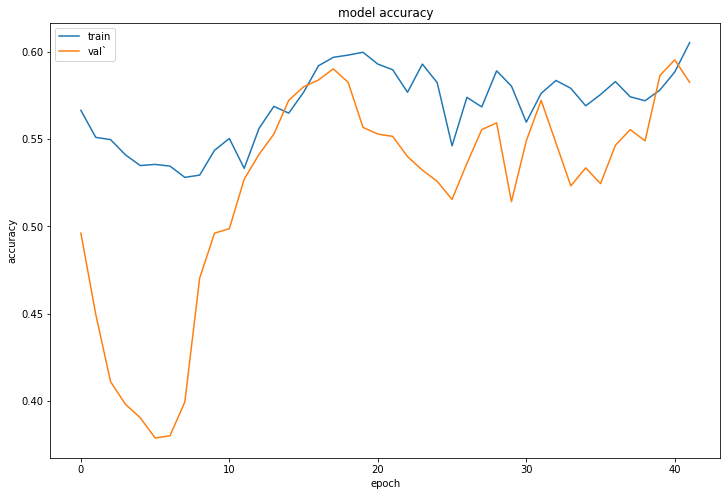

In [ ]:
# inspecting the accuracy for training and validation data across the epochs
# overall accuracy is increasing
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val`'], loc='upper left')
plt.show()

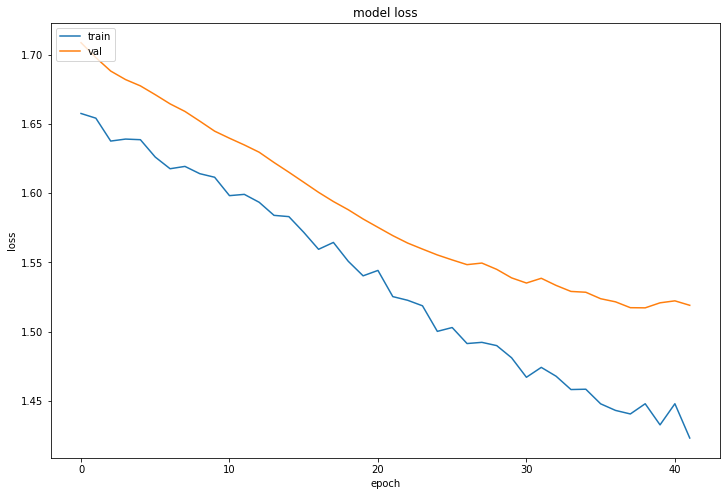

In [ ]:
# inspecting the loss for training and validation data across the epochs
# the loss is improving across epochs - no overfitting
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# evaluating the accuracy on the test set - it is not amazing
model.evaluate(X_test, y_test)

31/31 [==============================] - 1s 34ms/step - loss: 1.4465 - accuracy: 0.5862


[1.4465185403823853, 0.5861713290214539]

In [ ]:
# finding the predictions
y_pred = model.predict(X_test)
# creating a numpy array filled with zeroes
y_pred_hardmax = np.zeros_like(y_pred)
# assigning one to the class with the highest outcome
y_pred_hardmax[np.arange(len(y_pred)), y_pred.argmax(1)] = 1
# checking the effect
y_pred_hardmax

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
# changing back from one hot encoding to a list of classes
y_pred_hardmax= [np.argmax(y, axis=None, out=None) for y in y_pred_hardmax]
y_test= [np.argmax(y, axis=None, out=None) for y in y_test]

In [ ]:
# reversing the encoding
y_test = labelencoder_y.inverse_transform(y_test)
y_pred_hardmax = labelencoder_y.inverse_transform(y_pred_hardmax)

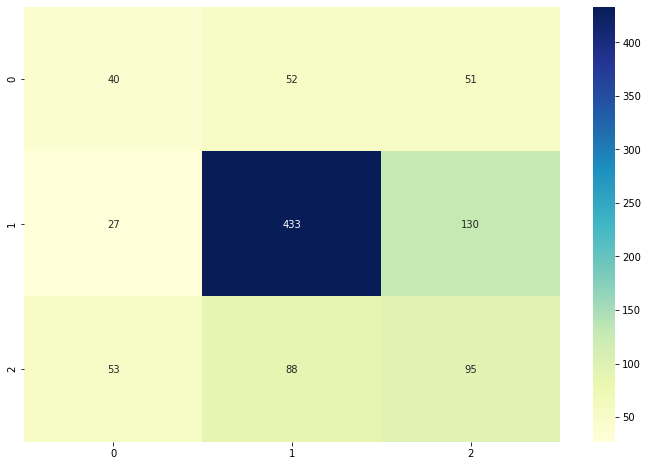

In [ ]:
# creating a confusion matrix 
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_pred_hardmax,y_test), annot = True, cmap = "YlGnBu",fmt='g')

In [ ]:
y_test

array(['neutral', 'positive', 'positive', 'negative', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral',
       'negative', 'positive', 'positive', 'neutral', 'positive',
       'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'positive', 'neutral', 'negative', 'neutral',
       'negative', 'positive', 'neutral', 'positive', 'negative',
       'negative', 'negative', 'neutral', 'negative', 'neutral',
       'positive', 'positive', 'positive', 'neutral', 'neutral',
       'neutral', 'neutral', 'positive', 'negative', 'positive',
       'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'positive', 'neutral', 'positive', 'neutral',
       'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'positive',
       'positive', 'positive', 'neutral', 'positive', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'positive', 'n

In [ ]:
# printing out the classification report
print(classification_report(y_pred_hardmax,y_test))

              precision    recall  f1-score   support

    negative       0.33      0.28      0.30       143
     neutral       0.76      0.73      0.74       590
    positive       0.34      0.40      0.37       236

    accuracy                           0.59       969
   macro avg       0.48      0.47      0.47       969
weighted avg       0.59      0.59      0.59       969



As can be seen the precision is very low, especially for the negative class. However, despite the classification problem, there is still a chance that the obtained results can be used to enhance the initial dataframe.
Softmax returns results as a set of n values (where n is the same as number of labels), where the highest value is then assigned as a label.

Due to imbalanced classes and similarity of the titles, a vast majority seems to be classified as neutral, however the variability of the values returned by softmax should be investigated before the data is scrapped.

Additionally, we wanted to mention that we are aware of some methods that could boost the performance of this model, namely using a custom loss function such as ohem or weighted crossentropy (so that the most difficult predictions would weight on the loss function much more, therefore forcing the network to learn to predict within the negative class as well) and pretraining the embedding layer using more financial headlines, not only the ones included in the database for the sentiment analysis. However, those solutions were not implemented this time due to the time constraint.

In [ ]:
# creating a dataframe from X_test
X_test_initial = pd.DataFrame(X_test_initial)
# resetting the index
X_test_initial = X_test_initial.reset_index()
# only keeping the title column
X_test_initial = X_test_initial.loc[:,"title"]
# turning it into a dataframe again
X_test_initial = pd.DataFrame(X_test_initial)

In [ ]:
# creating a dataframe from y_test
y_test = pd.DataFrame(y_test)
# creating a dataframe from the label predictions
y_pred_hardmax = pd.DataFrame(y_pred_hardmax)
# adding the new columns to X_test_initial
X_test_initial["y"] = y_test
X_test_initial["pred"] = y_pred_hardmax
# turning the softmax predictions into a dataframe
y_pred = pd.DataFrame(y_pred)
# merging the dataframes
X_test_initial = X_test_initial.merge(y_pred, left_index = True, right_index=True,copy = False)
# making two new dataframes - one containing the wrong and one the correct predictions
X_test_initial_correct = X_test_initial[X_test_initial.y==X_test_initial.pred]
X_test_initial_wrong = X_test_initial[X_test_initial.y!=X_test_initial.pred]

In [ ]:
# inspecting the correct predictions with describe
X_test_initial_correct.describe()

0           1           2
count  568.000000  568.000000  568.000000
mean     0.168555    0.465949    0.365495
std      0.140640    0.175513    0.041697
min      0.019236    0.085274    0.280769
25%      0.059701    0.385153    0.337080
50%      0.108946    0.527805    0.359272
75%      0.244152    0.601666    0.387733
max      0.454278    0.699995    0.474429

In [ ]:
# inspecting the wrong predictions with describe
X_test_initial_wrong.describe()

0           1           2
count  401.000000  401.000000  401.000000
mean     0.276899    0.334988    0.388113
std      0.150786    0.181630    0.039162
min      0.025389    0.086360    0.294134
25%      0.115407    0.169236    0.359560
50%      0.334239    0.288797    0.384266
75%      0.415860    0.516266    0.420439
max      0.456912    0.676049    0.466991

As can be seen, the wrong predictions have a lower average value for the neutral class, therefore we can expect, that the values returned by softmax function have enough variability to improve the predictions for the stock market.

# 5 Sentiment analysis for articles about JP Morgen

In [ ]:
# only selecting the articles for JPM
articles = articles[articles["stock"]=="JPM"]
# inspecting the dates - that was the basis for the choice of our timeframe
articles["date"].sort_values(ascending = True)

920759    2018-09-15 00:00:00
920751    2018-09-17 00:00:00
920752    2018-09-17 00:00:00
920753    2018-09-17 00:00:00
920758    2018-09-17 00:00:00
                 ...         
917898    2020-05-28 00:00:00
917895    2020-05-28 00:00:00
917889    2020-05-29 00:00:00
917888    2020-05-29 00:00:00
917887    2020-06-03 00:00:00
Name: date, Length: 2873, dtype: object

In [ ]:
# only keeping the relevant columns
articles = articles.loc[:,["headline","date"]]
# applying the cleanup function to each row of the dataframe
articles.headline = articles.headline.apply(lambda x: sneaky_cleanup(x))
# turning the date column to datetime format
articles["date"] = pd.to_datetime(articles["date"], format='%Y-%m-%d', errors='coerce')
# dropping the duplicated dates - we only want one article per day
articles = articles.drop_duplicates(subset = "date")
# inspecting the changes
articles.head()

headline       date
917887                Employee Benefit Research Institute 2020-06-03
917888  Should iShares Russell Top 200 Value ETF Be Yo... 2020-05-29
917890              Zacks Earnings Trends JPMorgan Disney 2020-05-28
917899         Louis Moore Bacon Buys Bets Corporate Debt 2020-05-27
917902  Stocks Rise On May 26 As The Bulls Fight To Ke... 2020-05-26

In [ ]:
# creating a jpm_titles list from the headlines
jpm_titles = articles.headline
# tokenizing it
jpm_titles = tokenizer.texts_to_sequences(jpm_titles)
# padding it to be 40, like the previous titles
jpm_titles =  keras.preprocessing.sequence.pad_sequences(jpm_titles, maxlen=40)

In [ ]:
# predicting the headings
jpm_preds = model.predict(jpm_titles)
jpm_preds

array([[0.15161332, 0.49048156, 0.35790518],
       [0.10270998, 0.5620987 , 0.33519137],
       [0.3633832 , 0.25785586, 0.37876087],
       ...,
       [0.34303254, 0.31528962, 0.34167778],
       [0.22618629, 0.42508557, 0.3487281 ],
       [0.14853683, 0.50947595, 0.34198722]], dtype=float32)

In [ ]:
# making an array of zeroes
jpm_pred_hardmax = np.zeros_like(jpm_preds)
# filling it with the correct label
jpm_pred_hardmax[np.arange(len(jpm_preds)), jpm_preds.argmax(1)] = 1
# turning it into a list of labels (from one-hot encoding)
jpm_pred_hardmax= [np.argmax(y, axis=None, out=None) for y in jpm_pred_hardmax]
# applying the labels
jpm_pred_hardmax = labelencoder_y.inverse_transform(jpm_pred_hardmax)
# checking the predictions
# all the predictions are neutral - it is disappointng, however not surprising
jpm_pred_hardmax

array(['neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral',
       'neutral', 'negative', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'negative',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'negative', 'negative', 'negative', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'neutral', 'neutral', 'neutral', 'negative', 'neutral', 'positive',
       'neutral', 'negative', 'neutral', 'neutral', 'negative', 'neutral',
       'negative', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'negative', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'positive', 'positive', 'neutral', 'ne

In [ ]:
# turning the predictions into a dataframe
jpm_preds = pd.DataFrame(jpm_preds)
# resetting the index
articles = articles.reset_index()
# merging the articles and predictions dataframe
articles = articles.merge(jpm_preds, left_index = True, right_index=True,copy = False)
articles.head()

index  ...         2
0  917887  ...  0.357905
1  917888  ...  0.335191
2  917890  ...  0.378761
3  917899  ...  0.338410
4  917902  ...  0.338206

[5 rows x 6 columns]

In [ ]:
# checking the variability of the class columns
# the differences between the values seem to be high enough
articles.describe()

index           0           1           2
count     554.000000  554.000000  554.000000  554.000000
mean   919289.268953    0.210677    0.436335    0.352989
std       830.993382    0.103542    0.116489    0.020211
min    917887.000000    0.042198    0.182314    0.289828
25%    918549.500000    0.127058    0.358438    0.339853
50%    919323.000000    0.189882    0.451513    0.353988
75%    920025.500000    0.295340    0.523513    0.364824
max    920759.000000    0.418768    0.664169    0.407647

# 6 Lime

In this section we decided to use lime to try to take a deeper dive and understand why some selected titles were classifed in the way they were.

In [ ]:
# creating a small function that allows for making a prediction on a passed string
def predict_complex(docs):
# turning a string into a sequence
    val_X = tokenizer.texts_to_sequences(docs)
# padding the string
    val_X = keras.preprocessing.sequence.pad_sequences(val_X, maxlen=60)
# making a prediction using the model
    y_preds = model.predict([val_X], batch_size=1000, verbose=0)
    return y_preds

In [ ]:
# creating an instance of text explainer
te = LimeTextExplainer()

In [ ]:
exp = te.explain_instance(articles['headline'].values[44], predict_complex)
# showing the highlighted text
exp.show_in_notebook(text=True)

In [ ]:
exp = te.explain_instance(articles['headline'].values[144], predict_complex)
# showing the highlighted text
exp.show_in_notebook(text=True)

# 7 Creating a neural network with the new data

In [ ]:
# merging the dataframe and the articles on the date
df = df.merge(articles, left_on = "date", right_on="date", how = "left")
# setting date as the index
df.set_index("date", inplace = True)
# only selecting the needed columns
df = df.loc[:,["close", "close-1", 0,1,2]]
# using forward fill - 10 articles were missing, but we assumed that if something was considered news the previous day
# and no new article was released, the sentiment from the previous day will still be important
df = df.fillna(method = "ffill")
# renaming the sentiment columns
df = df.rename(columns={0: 'negative', 1:"neutral",2:"positive"})
# checking the effect
df.head()

close   close-1  negative   neutral  positive
date                                                        
2018-09-17  0.560909       NaN  0.226186  0.425086  0.348728
2018-09-18  0.568321  0.560909  0.343033  0.315290  0.341678
2018-09-19  0.621818  0.568321  0.295296  0.368569  0.336134
2018-09-20  0.638092  0.621818  0.150033  0.484639  0.365329
2018-09-21  0.625524  0.638092  0.200285  0.451051  0.348664

Scaling was not used for the new variables since they were already between 0 and 1. Additionally, the relation in between them is likely important to consider.


In [ ]:
# creating a test and train split (80% for testing)
X_train = df.iloc[:,1:][1:int(len(df["close-1"])*0.8)]
X_test = df.iloc[:,1:][int(len(df["close-1"])*0.8):]
y_train = df["close"][1:int(len(df["close-1"])*0.8)]
y_test = df["close"][int(len(df["close-1"])*0.8):]
# reshaping the data appropriately
X_train = X_train.values.reshape(-1,4)
X_test = X_test.values.reshape(-1,4)
y_train = y_train.values.reshape(-1,1)
X_train = np.reshape(X_train, (X_train.shape[0],1,4))
X_test = np.reshape(X_test, (X_test.shape[0],1,4))

In [ ]:
# creating a sequential model
model = Sequential()
# adding the firstLSTM layer with 128 neurons, 0.2 dropout and recurrent dropout and return_sequences = True (to connect another LSTM layer)
model.add(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, input_shape = (1,4)))
# adding another LSTM layer - this time 64 neurons and no returning sequences
model.add(layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
# adding a dropout layer with 0.5 dropout rate
model.add(layers.Dropout(0.5))
# adding a dense layer with 128 neurons
model.add(layers.Dense(128, activation = "relu"))
# adding a dense layer with 64 neurons
model.add(layers.Dense(64, activation = "relu"))
# adding another dropout layer, this time just 0.2 dropout rate
model.add(layers.Dropout(0.2))
# adding the output layer with one neuron
model.add(layers.Dense(1))

In [ ]:
# inspecting the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 128)            68096     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

Upon testing it seemed that the same model architecture as for the first 
attempt (with the change of input shape) still seems to bring the best results in terms of performance.

In [ ]:
# defining early stopping with the patience of 5 periods
stop = EarlyStopping(monitor = "loss", patience = 5, mode = "min", restore_best_weights=True)
# the same learning rate as for the first model - again caused by stability issues
opt = optimizers.Adam(learning_rate=0.001)

In [ ]:
# compiling the model
model.compile(loss='mean_squared_error', optimizer=opt)

In [ ]:
# fitting the model to the data
history = model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=1, callbacks = [stop])

Epoch 1/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0459
Epoch 2/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0264
Epoch 3/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0182
Epoch 4/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0176
Epoch 5/50
343/343 [==============================] - 2s 5ms/step - loss: 0.0164
Epoch 6/50
343/343 [==============================] - 2s 4ms/step - loss: 0.0149
Epoch 7/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0150
Epoch 8/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0134
Epoch 9/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0153
Epoch 10/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0120
Epoch 11/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0143
Epoch 12/50
343/343 [==============================] - 1s 4ms/step - loss: 0.0147
Epoch 13/50
343/343 [====

In [ ]:
# predicting the data
y_pred = model.predict(X_test)

In [ ]:
# filling a column with missing values
df["pred"] = np.nan
# filling the column with the predictions
df["pred"][int(len(df["close-1"])*0.8):] = np.array(y_pred).squeeze(1)

<Figure size 864x576 with 0 Axes>

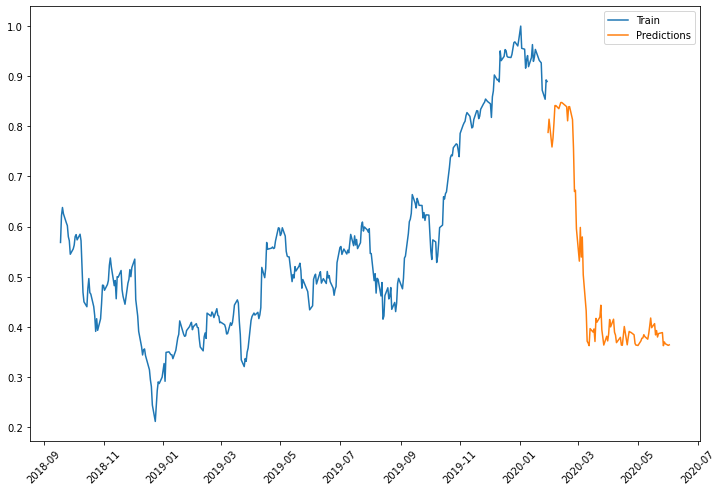

In [ ]:
# plotting the predictions as an extension of the training data
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(df.close[1:int(len(df["close-1"])*0.8)])
plt.plot(df["pred"][int(len(df["close-1"])*0.8):])
plt.legend(['Train','Predictions'], loc='upper_center')
plt.show()

<Figure size 864x576 with 0 Axes>

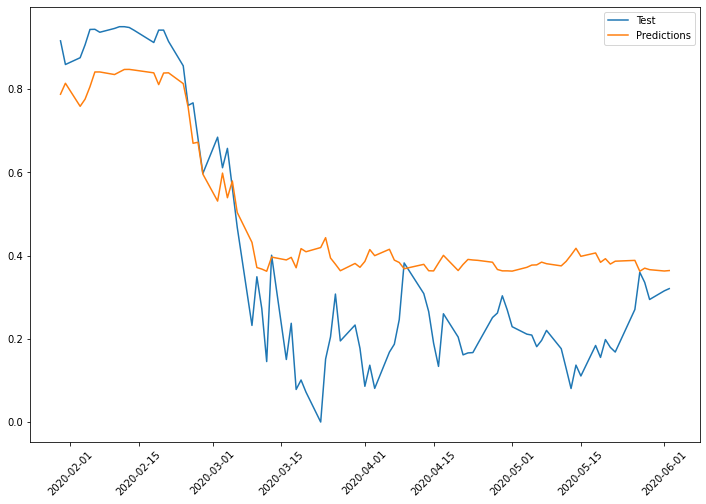

In [ ]:
# plotting the predictions against the test data
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.plot(y_test)
plt.plot(df["pred"][int(len(df["close-1"])*0.8):])
plt.legend(['Test','Predictions'], loc='upper_center')
plt.show()

In [ ]:
# checking the mean squared error
# it improved! woooohooooo!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
np.sqrt(np.mean(df["pred"][int(len(df["close-1"])*0.8):] - y_test)**2)

0.10070746234883342